This is an exploration of the data from AirBNB on Seattle's 2023 bookings. I will be looking at a few questions and seeing if I can answer them from the provided data
> 1. What neighborhoods have the highest average prices?
> 2. What neighborhoods have the highest average reviews?
> 3. What predicts price? 
> 4. What predicts avaiability?
> 3. What predicts number of reviews?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import datetime as dt
%matplotlib inline

list_df = pd.read_csv('listings.csv.gz', compression='gzip')
review_df = pd.read_csv('reviews.csv.gz', compression='gzip')
cal_df = pd.read_csv('calendar.csv.gz', compression='gzip')

### Exploration 

Let's take a look at the first few rows and some info about each dataframe. 

In [2]:
list_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6606,https://www.airbnb.com/rooms/6606,20231220185704,2023-12-21,city scrape,Guesthouse in Seattle · ★4.60 · 1 bedroom · 1 ...,NaN,"A peaceful yet highly accessible neighborhood,...",https://a0.muscache.com/pictures/45742/21116d7...,14942,...,4.76,4.88,4.57,str-opli-19-002622,f,2,2,0,0,0.91
1,9419,https://www.airbnb.com/rooms/9419,20231220185704,2023-12-20,city scrape,Rental unit in Seattle · ★4.72 · 1 bedroom · 1...,NaN,"Lots of restaurants (see our guide book) bars,...",https://a0.muscache.com/pictures/56645186/e5fb...,30559,...,4.90,4.67,4.66,STR-OPLI-19-003039,f,9,0,9,0,1.19
2,9531,https://www.airbnb.com/rooms/9531,20231220185704,2023-12-20,city scrape,Home in Seattle · ★4.97 · 2 bedrooms · 3 beds ...,NaN,The neighborhood is awesome! Just far enough ...,https://a0.muscache.com/pictures/30470355/052c...,31481,...,4.95,4.98,4.91,STR-OPLI-19-002182,f,2,2,0,0,0.59
3,9534,https://www.airbnb.com/rooms/9534,20231220185704,2023-12-20,city scrape,Guest suite in Seattle · ★4.99 · 2 bedrooms · ...,NaN,The neighborhood is the best of two worlds...w...,https://a0.muscache.com/pictures/30476721/0751...,31481,...,4.99,4.96,4.95,STR-OPLI-19-002182,f,2,2,0,0,0.52
4,9596,https://www.airbnb.com/rooms/9596,20231220185704,2023-12-21,previous scrape,Rental unit in Seattle · ★4.56 · 1 bedroom · 4...,NaN,"if you arrive early for check in at 3, I reco...",https://a0.muscache.com/pictures/665252/102d18...,14942,...,4.66,4.91,4.56,STR -OPLI-19-002622,f,2,2,0,0,0.63


In [3]:
review_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6606,5664,2009-07-17,18085,Vivian,"The Urban Cottage is comfortable, beautiful, f..."
1,6606,338761,2011-06-27,434031,Elliott,Joyce was a wonderful host and the urban cotta...
2,6606,467904,2011-08-22,976182,Allegra,Beautiful cottage and warm hospitality from Jo...
3,6606,480017,2011-08-27,997921,Brittney,"Joyce is a wonderful host! She is warm, helpfu..."
4,6606,487278,2011-08-30,206901,Pascal,Joyce's cottage is the perfect Seattle locatio...


In [4]:
cal_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6606,2023-12-21,f,$90.00,NaN,30.0,1125.0
1,6606,2023-12-22,f,$90.00,NaN,30.0,1125.0
2,6606,2023-12-23,t,$90.00,NaN,30.0,1125.0
3,6606,2023-12-24,t,$90.00,NaN,30.0,1125.0
4,6606,2023-12-25,t,$90.00,NaN,30.0,1125.0


In [5]:
list_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6882 entries, 0 to 6881
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6882 non-null   int64  
 1   listing_url                                   6882 non-null   object 
 2   scrape_id                                     6882 non-null   int64  
 3   last_scraped                                  6882 non-null   object 
 4   source                                        6882 non-null   object 
 5   name                                          6882 non-null   object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         5013 non-null   object 
 8   picture_url                                   6882 non-null   object 
 9   host_id                                       6882 non-null   i

In [6]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468790 entries, 0 to 468789
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     468790 non-null  int64 
 1   id             468790 non-null  int64 
 2   date           468790 non-null  object
 3   reviewer_id    468790 non-null  int64 
 4   reviewer_name  468790 non-null  object
 5   comments       468730 non-null  object
dtypes: int64(3), object(3)
memory usage: 21.5+ MB


In [7]:
cal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512306 entries, 0 to 2512305
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  float64
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 134.2+ MB


Price is the output we're most interested in, so let's make sure prices are an float. 

In [8]:
list_df['price'].value_counts(dropna=False)

NaN        378
$100.00    103
$80.00     102
$85.00      83
$99.00      83
          ... 
$799.00      1
$247.00      1
$513.00      1
$338.00      1
$476.00      1
Name: price, Length: 534, dtype: int64

Well... that's annoying. We're missing prices and the price is stored as a string because it contains the currency symbol. As a global company, it makes perfect sense for AirBNB to use the currency symbol, but every listing in Seattle should use USD as its currency. 

Let's get rid of those $ and any commas that might appear in large prices. 

In [9]:
list_df['price_float'] = list_df['price'].str.split("$").str[1]
list_df['price_float'] = list_df['price_float'].str.replace(",","")
list_df['price_float'] = list_df['price_float'].astype('float64')

I would like to graph the distribution of prices, but the fact that there are still NaNs will cause an issue. Getting those prices will also make any analysis stronger. We'll return to the issue of missing prices later on.

First, let's turn out attention to reviews. Let's look at the number of reviews. 

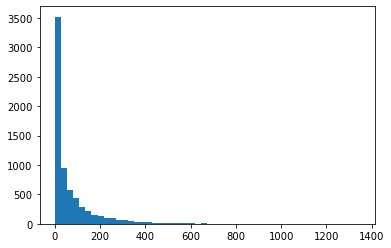

In [10]:
plt.hist(data=list_df, x = "number_of_reviews",bins = 50);

It looks like many places have few reivews, but there are a few properties with lots of reviews that stretch this graph out. Let's zoom into the places with the fewest reviews. 

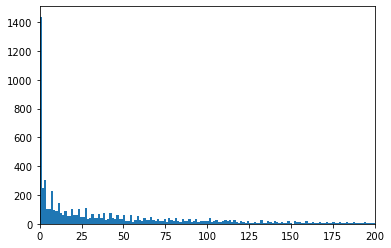

In [11]:
plt.hist(data=list_df, x = "number_of_reviews",bins = 1000);
plt.xlim(0,200);

The first bucket is capturing places with 0 or 1 reviews, which accounts for most properties. Now let's look at those review scores. 

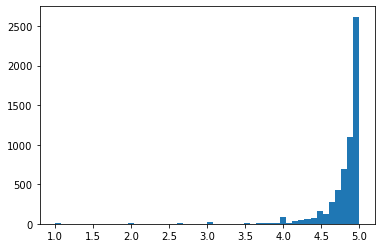

In [12]:
plt.hist(data=list_df, x = "review_scores_rating",bins = 50);


Most places have pretty high reviews! Let's try looking at some of the component review scores. 

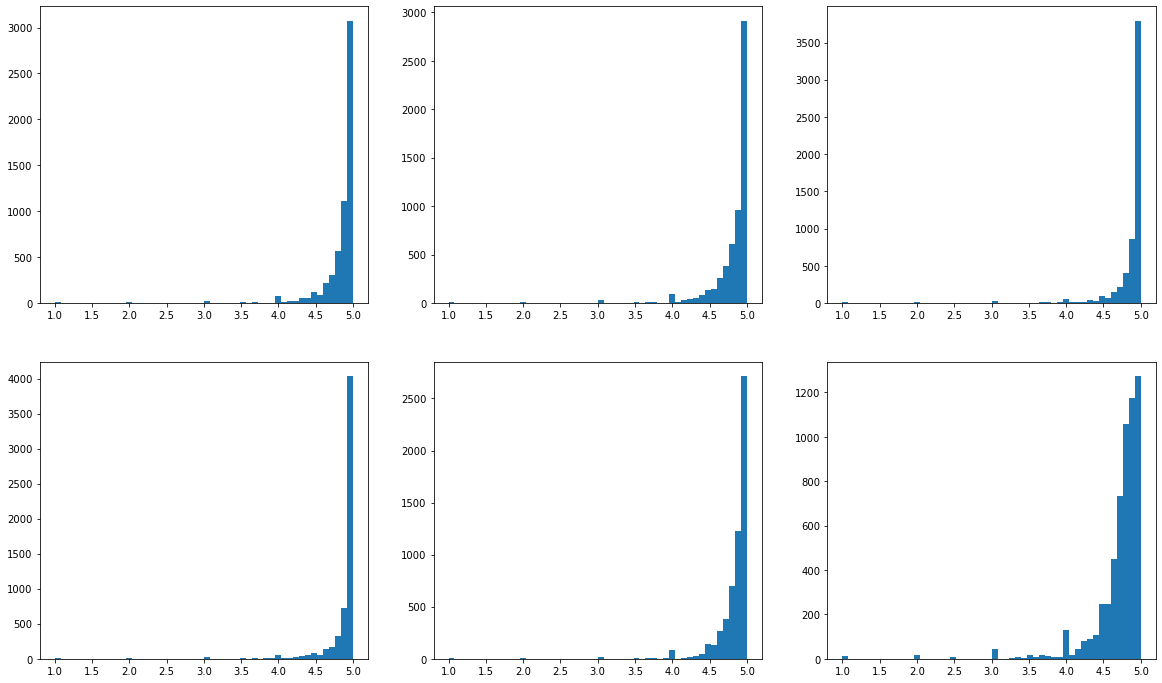

In [13]:
plt.figure(figsize = [20, 12]) 

plt.subplot(2, 3, 1) 
plt.hist(data=list_df, x='review_scores_accuracy', bins=50);


plt.subplot(2, 3, 2) 
plt.hist(data=list_df, x='review_scores_cleanliness', bins=50);


plt.subplot(2, 3, 3)  
plt.hist(data=list_df, x='review_scores_checkin', bins=50);


plt.subplot(2, 3, 4) 
plt.hist(data=list_df, x='review_scores_communication', bins=50);

plt.subplot(2, 3, 5)  
plt.hist(data=list_df, x='review_scores_location', bins=50);


plt.subplot(2, 3, 6) 
plt.hist(data=list_df, x='review_scores_value', bins=50);

People are almost always very happy with host communication, but the reviews for the value for their money varies the most. 


### What are the most expensive neighborhoods?
Now we can look at some info about neighborhoods. 

In [14]:
list_df['neighbourhood_cleansed'].value_counts()

Broadway               388
Belltown               351
Wallingford            259
Fremont                254
University District    229
                      ... 
Meadowbrook             13
Rainier View            12
Industrial District      2
Harbor Island            1
Holly Park               1
Name: neighbourhood_cleansed, Length: 89, dtype: int64

In [15]:
neighborhood_counts = list_df['neighbourhood_cleansed'].value_counts()
print(neighborhood_counts)

Broadway               388
Belltown               351
Wallingford            259
Fremont                254
University District    229
                      ... 
Meadowbrook             13
Rainier View            12
Industrial District      2
Harbor Island            1
Holly Park               1
Name: neighbourhood_cleansed, Length: 89, dtype: int64


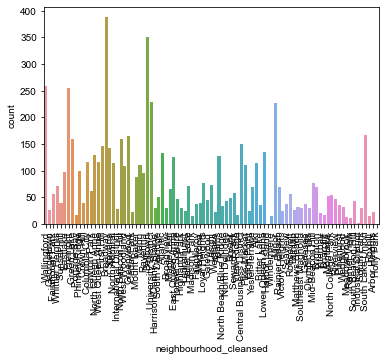

In [16]:
sns.countplot(data=list_df, x='neighbourhood_cleansed')
sns.set(rc={'figure.figsize':(25,20)})
plt.xticks(rotation = 90);

I'll take a look at prices by neighborhood. I'll make a quick function to do so. 

In [17]:
def grouped_means_graph(df, x_axis, y_axis, fig_size):
    '''INPUT: dataframe, the group by column as the x axis, the groupby outcome as the y axis, and the figure size
    
    OUTPUT: A correctly labeled graph where the mean of each y outcome grouped by the x outcome is shown
    '''
    
    grouped_df = df.groupby([x_axis])[y_axis].mean()
    grouped_df.plot.bar(figsize=(fig_size),title = f"{x_axis} vs mean of {y_axis}", xlabel = x_axis, ylabel = (f'Mean {y_axis}'))

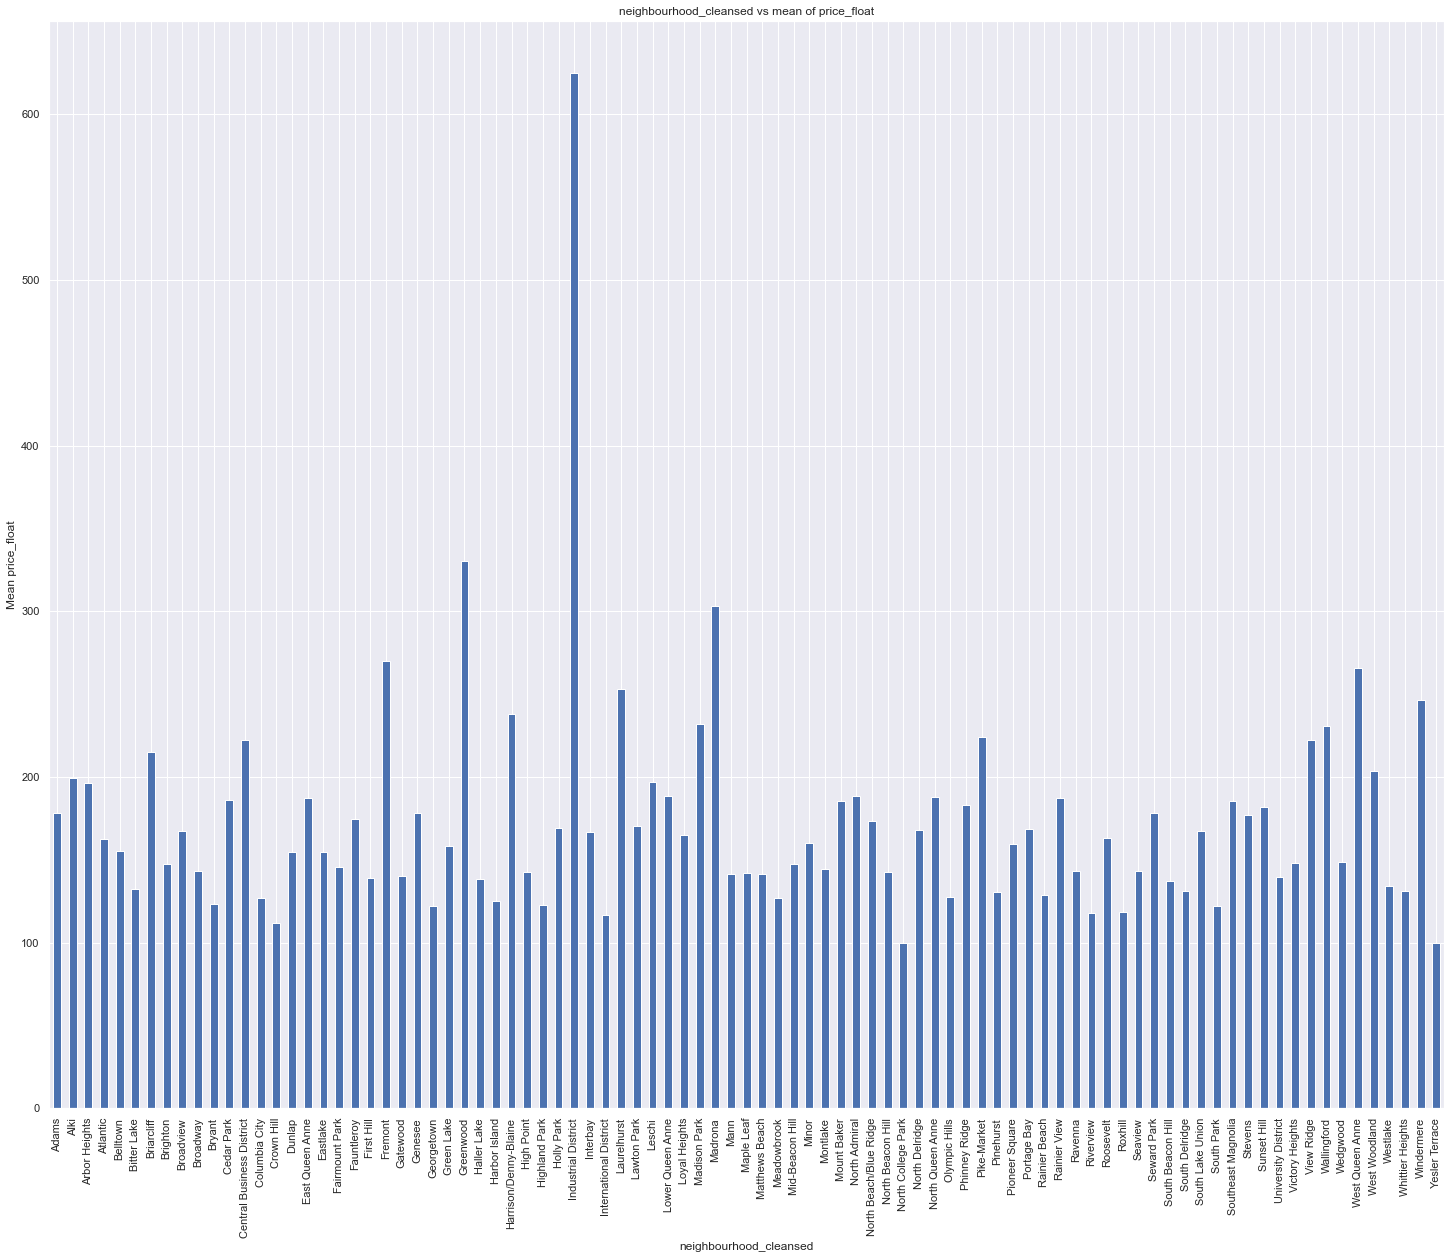

In [18]:
grouped_means_graph(list_df, 'neighbourhood_cleansed', 'price_float',(25,20))

There are only a few listings in the industrial district, and at least one of them must be quite expensive!Some other pricy neighborhoods include Fremont, Greenwood, and Phinney Ridge. 

AirBNB also has info about larger neighborhood groups. 

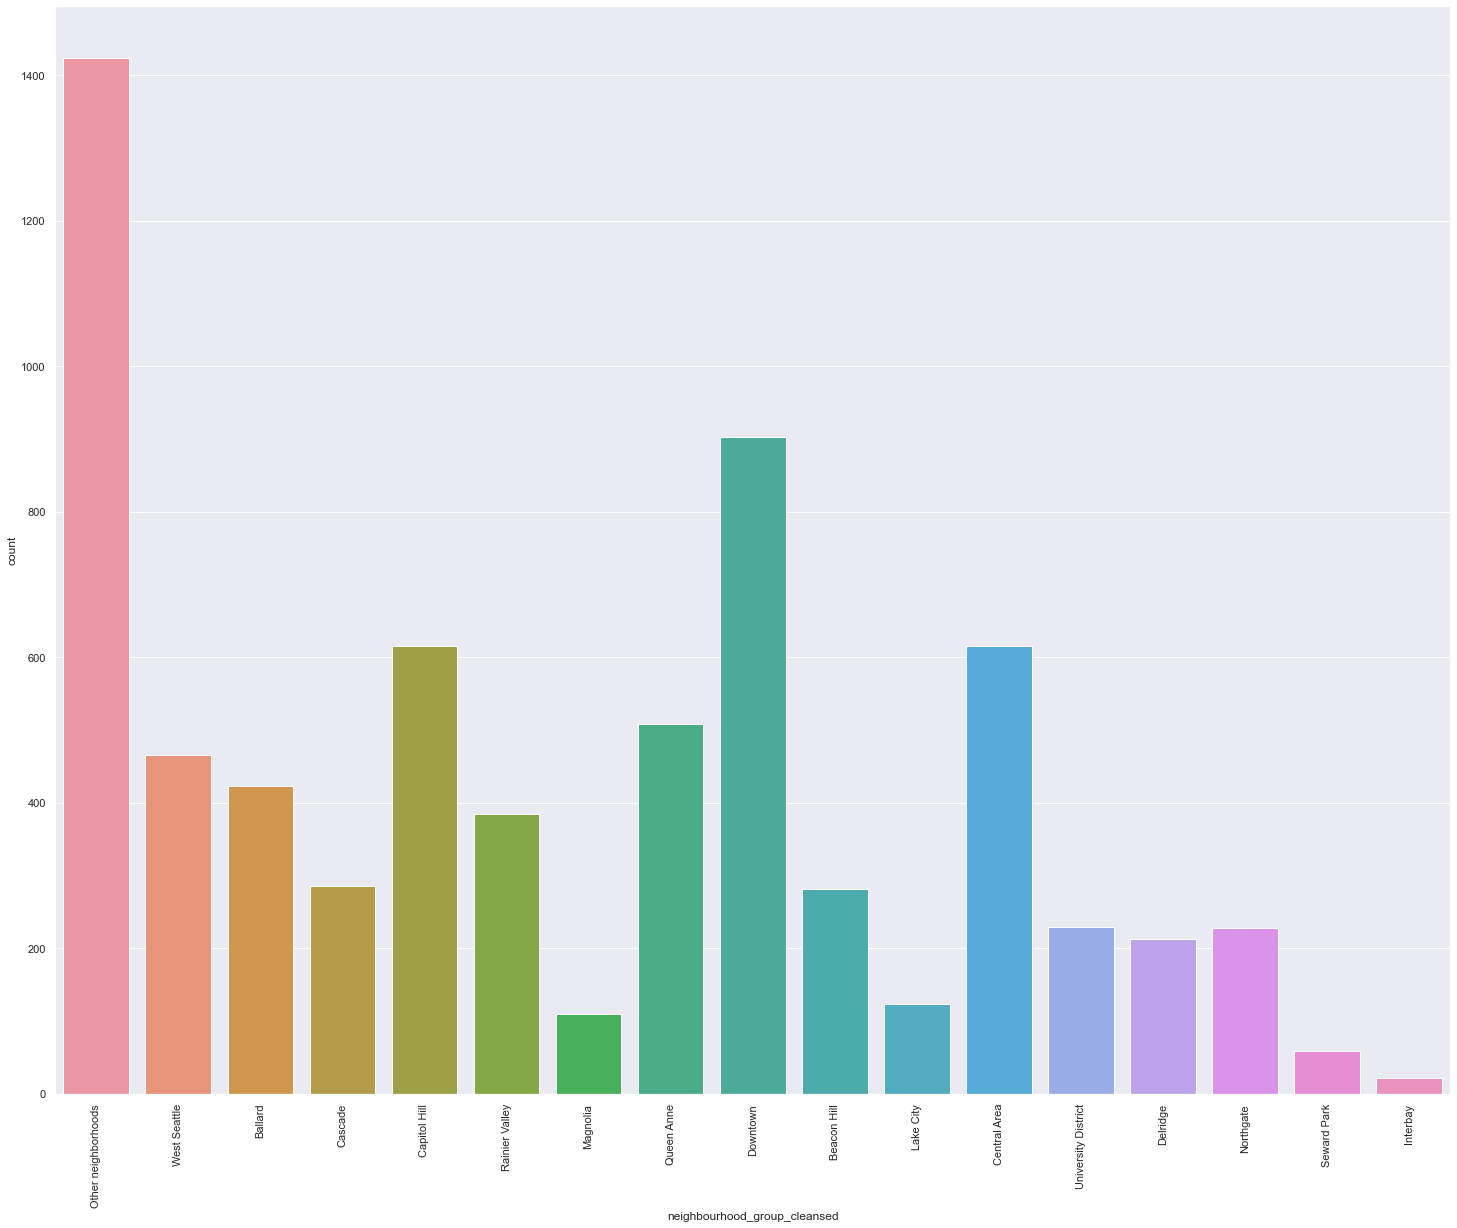

In [19]:
sns.countplot(data=list_df, x='neighbourhood_group_cleansed')
sns.set(rc={'figure.figsize':(10,6)})
plt.xticks(rotation = 90);

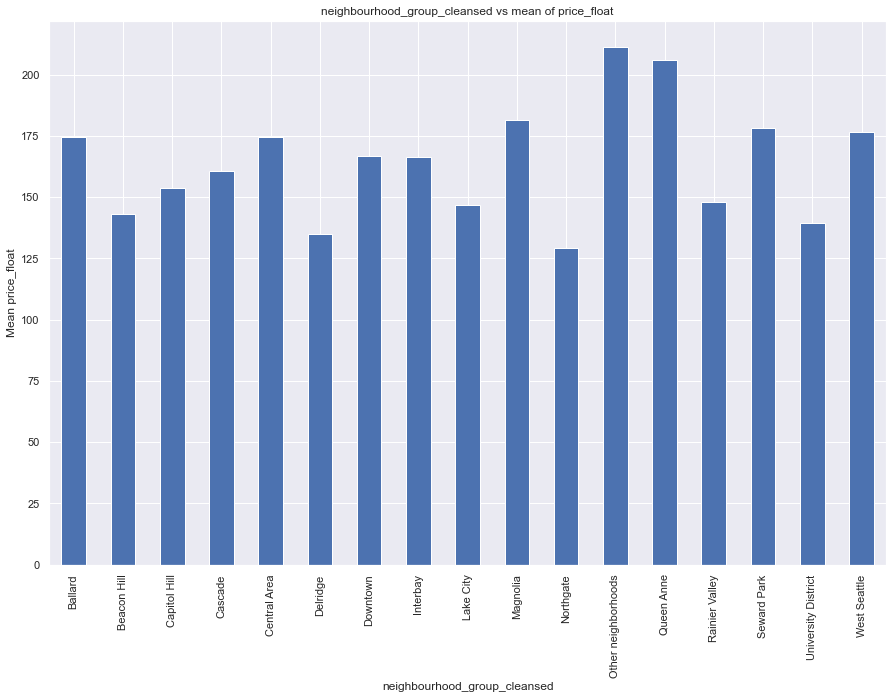

In [20]:
grouped_means_graph(list_df, 'neighbourhood_group_cleansed', 'price_float',(15,10))

The catch-all other neighborhoods category is the highest, which makes sense since many of the highest price neighborhoods from above will end up in this category. Queen Anne has the highest average price per night otherwise. 

### What are the best reviewed neighborhoods?

(4.0, 5.0)

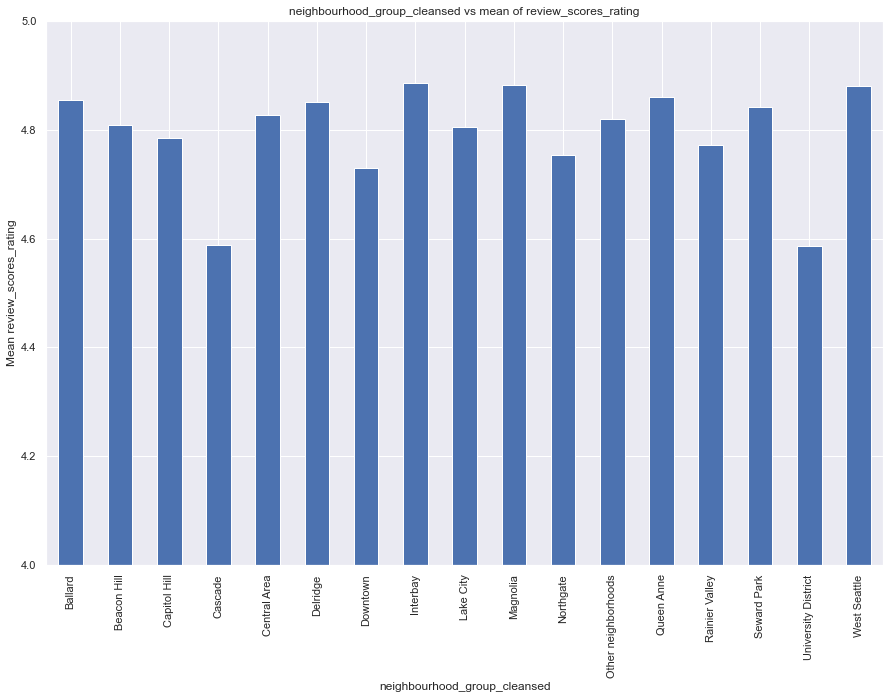

In [21]:
grouped_means_graph(list_df, 'neighbourhood_group_cleansed', 'review_scores_rating',(15,10))
plt.ylim(4,5)

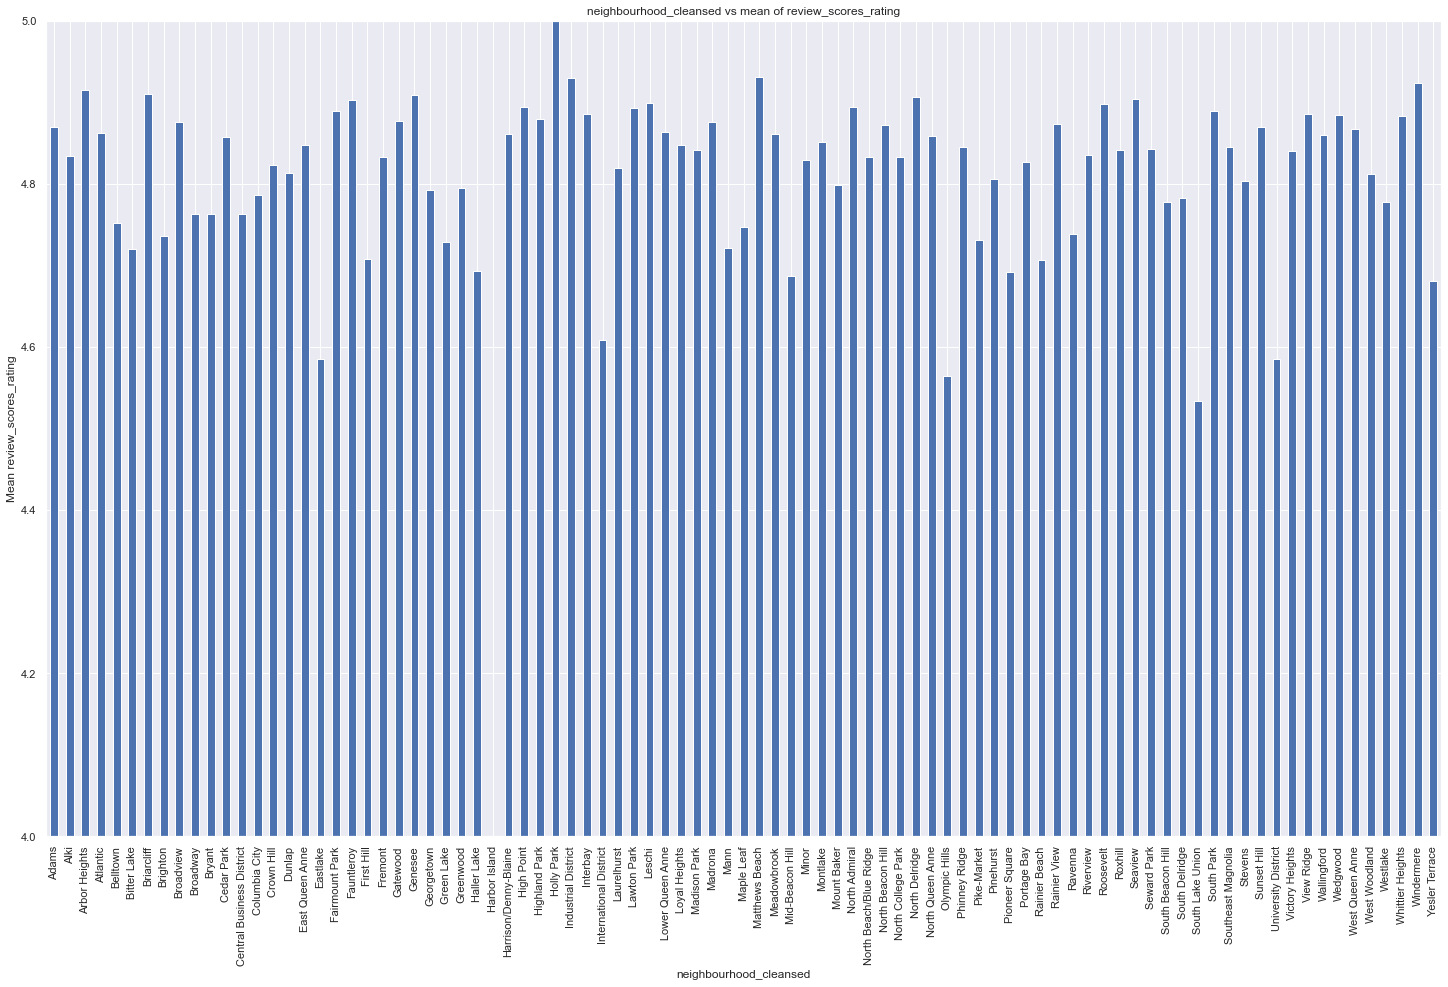

In [22]:
grouped_means_graph(list_df, 'neighbourhood_cleansed', 'review_scores_rating',(25,15))
plt.ylim(4,5);

In [23]:
# Group the DataFrame by "neighborhood" and count the number of reviews in each group
list_df['review_count'] = list_df.groupby('neighbourhood_cleansed')['review_scores_rating'].transform('count')

# Filter the DataFrame to include only the rows where the review count is greater than or equal to ten
filtered1_df = list_df[list_df['review_count'] >= 10]

# Remove the "review_count" column from the filtered DataFrame
filtered1_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_float,review_count
0,6606,https://www.airbnb.com/rooms/6606,20231220185704,2023-12-21,city scrape,Guesthouse in Seattle · ★4.60 · 1 bedroom · 1 ...,NaN,"A peaceful yet highly accessible neighborhood,...",https://a0.muscache.com/pictures/45742/21116d7...,14942,...,4.57,str-opli-19-002622,f,2,2,0,0,0.91,99.0,225
1,9419,https://www.airbnb.com/rooms/9419,20231220185704,2023-12-20,city scrape,Rental unit in Seattle · ★4.72 · 1 bedroom · 1...,NaN,"Lots of restaurants (see our guide book) bars,...",https://a0.muscache.com/pictures/56645186/e5fb...,30559,...,4.66,STR-OPLI-19-003039,f,9,0,9,0,1.19,67.0,23
2,9531,https://www.airbnb.com/rooms/9531,20231220185704,2023-12-20,city scrape,Home in Seattle · ★4.97 · 2 bedrooms · 3 beds ...,NaN,The neighborhood is awesome! Just far enough ...,https://a0.muscache.com/pictures/30470355/052c...,31481,...,4.91,STR-OPLI-19-002182,f,2,2,0,0,0.59,184.0,49
3,9534,https://www.airbnb.com/rooms/9534,20231220185704,2023-12-20,city scrape,Guest suite in Seattle · ★4.99 · 2 bedrooms · ...,NaN,The neighborhood is the best of two worlds...w...,https://a0.muscache.com/pictures/30476721/0751...,31481,...,4.95,STR-OPLI-19-002182,f,2,2,0,0,0.52,155.0,49
4,9596,https://www.airbnb.com/rooms/9596,20231220185704,2023-12-21,previous scrape,Rental unit in Seattle · ★4.56 · 1 bedroom · 4...,NaN,"if you arrive early for check in at 3, I reco...",https://a0.muscache.com/pictures/665252/102d18...,14942,...,4.56,STR -OPLI-19-002622,f,2,2,0,0,0.63,NaN,225


(4.0, 5.0)

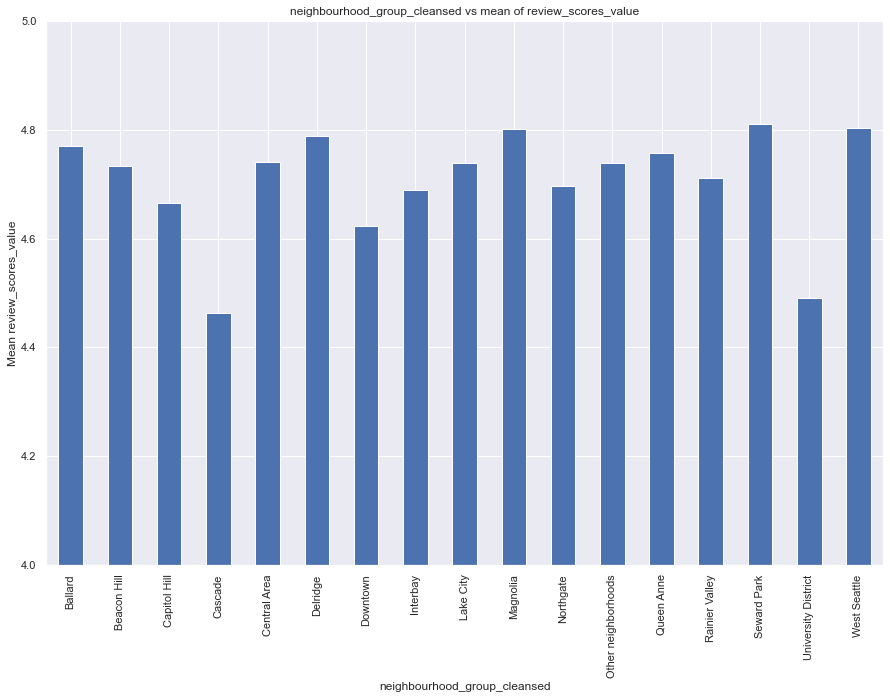

In [24]:
grouped_means_graph(list_df, 'neighbourhood_group_cleansed', 'review_scores_value',(15,10))
plt.ylim(4,5)

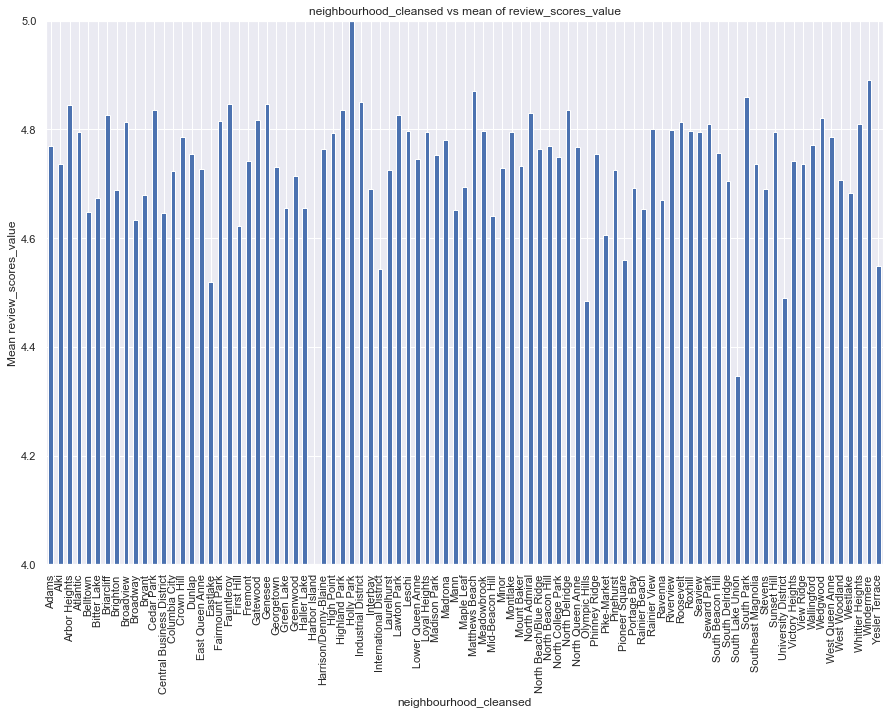

In [25]:
grouped_means_graph(list_df, 'neighbourhood_cleansed', 'review_scores_value',(15,10))
plt.ylim(4,5);

Let's look at some attributes of the AirBNBs.

In [26]:
list_df['beds'].value_counts(dropna=False)

1.0     2902
2.0     1874
3.0     1077
4.0      495
5.0      216
6.0      122
7.0       64
NaN       56
8.0       36
9.0       20
10.0      11
12.0       3
14.0       2
15.0       2
16.0       1
11.0       1
Name: beds, dtype: int64

In [27]:
list_df['accommodates'].value_counts(dropna=False)

2     2457
4     1607
6      818
3      531
5      358
8      325
1      269
7      141
10     132
12      74
16      60
9       46
11      28
14      23
15       7
13       6
Name: accommodates, dtype: int64

In [28]:
list_df['bathrooms_text'].value_counts(dropna=False)

1 bath               3940
2 baths              1029
2.5 baths             367
1 private bath        329
1.5 baths             313
1 shared bath         298
3 baths               229
3.5 baths             136
2 shared baths         68
1.5 shared baths       60
4 baths                34
3 shared baths         23
4.5 baths              10
Half-bath               9
0 baths                 8
0 shared baths          6
6 baths                 5
16 shared baths         4
4 shared baths          2
2.5 shared baths        2
6.5 baths               2
7 baths                 2
5 baths                 2
3.5 shared baths        1
Shared half-bath        1
Private half-bath       1
5.5 baths               1
Name: bathrooms_text, dtype: int64

The number of beds and people accomodated are already in good shape, but bathrooms will take some work. There's two variables here: how many bathrooms, and whether those bathrooms are shared. We'll need number of baths and a binary variable for shared or not. First, let's turn half-bath into .5

In [29]:
list_df['bathrooms_text'] = list_df['bathrooms_text'].str.replace('half-bath', "0.5")
list_df['bathrooms_text'] = list_df['bathrooms_text'].str.replace('Half-bath', "0.5")

In [30]:
list_df['bathrooms_text'].value_counts(dropna=False)

1 bath              3940
2 baths             1029
2.5 baths            367
1 private bath       329
1.5 baths            313
1 shared bath        298
3 baths              229
3.5 baths            136
2 shared baths        68
1.5 shared baths      60
4 baths               34
3 shared baths        23
4.5 baths             10
0.5                    9
0 baths                8
0 shared baths         6
6 baths                5
16 shared baths        4
4 shared baths         2
2.5 shared baths       2
6.5 baths              2
7 baths                2
5 baths                2
3.5 shared baths       1
Shared 0.5             1
Private 0.5            1
5.5 baths              1
Name: bathrooms_text, dtype: int64

Now, let's extract the number of bathrooms. 

In [31]:
list_df['no_of_bathrooms'] = list_df['bathrooms_text'].str.extract('(\d+.?\d*)').astype(float)

In [32]:
list_df['no_of_bathrooms'].value_counts(dropna=False)

1.0     4567
2.0     1097
1.5      373
2.5      369
3.0      252
3.5      137
4.0       36
0.0       14
0.5       11
4.5       10
6.0        5
16.0       4
6.5        2
7.0        2
5.0        2
5.5        1
Name: no_of_bathrooms, dtype: int64

Next, let's pick out the shared bathrooms. 

In [33]:
list_df['shared'] = list_df['bathrooms_text'].str.contains('shared').astype(int)

In [34]:
list_df['shared'].value_counts(dropna=False)

0    6418
1     464
Name: shared, dtype: int64

In [35]:
list_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_float,review_count,no_of_bathrooms,shared
0,6606,https://www.airbnb.com/rooms/6606,20231220185704,2023-12-21,city scrape,Guesthouse in Seattle · ★4.60 · 1 bedroom · 1 ...,NaN,"A peaceful yet highly accessible neighborhood,...",https://a0.muscache.com/pictures/45742/21116d7...,14942,...,f,2,2,0,0,0.91,99.0,225,1.0,0
1,9419,https://www.airbnb.com/rooms/9419,20231220185704,2023-12-20,city scrape,Rental unit in Seattle · ★4.72 · 1 bedroom · 1...,NaN,"Lots of restaurants (see our guide book) bars,...",https://a0.muscache.com/pictures/56645186/e5fb...,30559,...,f,9,0,9,0,1.19,67.0,23,3.0,1
2,9531,https://www.airbnb.com/rooms/9531,20231220185704,2023-12-20,city scrape,Home in Seattle · ★4.97 · 2 bedrooms · 3 beds ...,NaN,The neighborhood is awesome! Just far enough ...,https://a0.muscache.com/pictures/30470355/052c...,31481,...,f,2,2,0,0,0.59,184.0,49,1.0,0
3,9534,https://www.airbnb.com/rooms/9534,20231220185704,2023-12-20,city scrape,Guest suite in Seattle · ★4.99 · 2 bedrooms · ...,NaN,The neighborhood is the best of two worlds...w...,https://a0.muscache.com/pictures/30476721/0751...,31481,...,f,2,2,0,0,0.52,155.0,49,1.0,0
4,9596,https://www.airbnb.com/rooms/9596,20231220185704,2023-12-21,previous scrape,Rental unit in Seattle · ★4.56 · 1 bedroom · 4...,NaN,"if you arrive early for check in at 3, I reco...",https://a0.muscache.com/pictures/665252/102d18...,14942,...,f,2,2,0,0,0.63,NaN,225,1.0,0


In [36]:
list_df['property_type'].value_counts(dropna=False)

Entire home                           1842
Entire rental unit                    1701
Private room in home                   689
Entire guest suite                     585
Entire condo                           559
Entire townhouse                       525
Entire guesthouse                      269
Private room in townhouse              108
Entire serviced apartment               88
Room in boutique hotel                  73
Private room in rental unit             71
Entire loft                             50
Entire cottage                          48
Room in hotel                           39
Private room in guest suite             30
Entire bungalow                         29
Tiny home                               22
Private room in bed and breakfast       21
Entire vacation home                    18
Private room in bungalow                11
Private room in condo                   11
Private room in villa                    8
Entire villa                             6
Entire cabi

In [37]:
list_df['room_type'].value_counts(dropna=False)

Entire home/apt    5780
Private room       1083
Shared room          19
Name: room_type, dtype: int64

Although property type contains more info than room type, I don't think encoding property type will add any value beyond what room type already does; what matters is whether the listing is an entire property, private room, or shared room. 

Time to return to the missing prices. What can we learn about the properties with missing prices? 

There's also another source of price data, in the calendar dataframe. Let's see if this listing has price info there. 

In [38]:
cal_df[cal_df["listing_id"] == 1042867741784045446]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
2488254,1042867741784045446,2023-12-21,f,$125.00,NaN,30.0,90.0
2488255,1042867741784045446,2023-12-22,t,$125.00,NaN,30.0,90.0
2488256,1042867741784045446,2023-12-23,t,$125.00,NaN,30.0,90.0
2488257,1042867741784045446,2023-12-24,t,$125.00,NaN,30.0,90.0
2488258,1042867741784045446,2023-12-25,t,$125.00,NaN,30.0,90.0
...,...,...,...,...,...,...,...
2488614,1042867741784045446,2024-12-15,f,$125.00,NaN,30.0,90.0
2488615,1042867741784045446,2024-12-16,f,$125.00,NaN,30.0,90.0
2488616,1042867741784045446,2024-12-17,f,$125.00,NaN,30.0,90.0
2488617,1042867741784045446,2024-12-18,f,$125.00,NaN,30.0,90.0


Aha! The calendar dataframe may have the info we need for price. 

In [39]:
cal_df['price'].value_counts(dropna=False)

$150.00      70458
$100.00      67868
$125.00      60241
$250.00      54758
$200.00      47457
             ...  
$36.00         365
$316.00        365
$795.00        365
$1,051.00      365
$616.00        365
Name: price, Length: 526, dtype: int64

In [40]:
cal_df['price'].isnull().sum()

0

Perfect. There are no properties with missing prices. Let's turn them into numbers and figure out how to combine them with the listing dataframe. 

In [41]:
cal_df['price_float'] = cal_df['price'].str.split("$").str[1]
cal_df['price_float'] = cal_df['price_float'].str.replace(",","")
cal_df['price_float'] = cal_df['price_float'].astype('float64')

Great. There's a line in the calendar dataframe for every night in the next year; we don't need to bring each of those lines into this new database. We can create a new dataframe that groups each listing by the mean that will have the same number of rows as our listing dataframe. 

In [42]:
df3 = cal_df.groupby('listing_id').mean().reset_index()

In [43]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6882 entries, 0 to 6881
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   listing_id      6882 non-null   int64  
 1   adjusted_price  0 non-null      float64
 2   minimum_nights  6882 non-null   float64
 3   maximum_nights  6882 non-null   float64
 4   price_float     6882 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 269.0 KB


Perfect. Now we can merge this mean price dataframe into the listing data frame. 

In [44]:
merged_df = list_df.merge(df3, left_on='id', right_on='listing_id')

In [45]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6882 entries, 0 to 6881
Data columns (total 84 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6882 non-null   int64  
 1   listing_url                                   6882 non-null   object 
 2   scrape_id                                     6882 non-null   int64  
 3   last_scraped                                  6882 non-null   object 
 4   source                                        6882 non-null   object 
 5   name                                          6882 non-null   object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         5013 non-null   object 
 8   picture_url                                   6882 non-null   object 
 9   host_id                                       6882 non-null   i

In [46]:
"neighbourhood_cleansed","neighbourhood_group_cleansed","room_type","accommodates","beds","minimum_nights_avg_ntm","maximum_nights_avg_ntm","review_scores_rating",
"review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value",
"instant_bookable","no_of_bathrooms","shared"

('instant_bookable', 'no_of_bathrooms', 'shared')

In [47]:
merged_df['price_float_y'].value_counts(dropna=False)

150.0    193
100.0    186
125.0    165
250.0    150
200.0    130
        ... 
331.0      1
364.0      1
530.0      1
316.0      1
616.0      1
Name: price_float_y, Length: 527, dtype: int64

In [48]:
merged_df['price_float_y'].isnull().sum()

0

Excellent. Every listing has a price pulled from the listing dataframe. 

Now that we've been able to impute the missing price information, let's look at properties that have no reviews. 

In [49]:
no_reviews_df = list_df[list_df['review_scores_rating'].isnull()]

In [50]:
no_reviews_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_float,review_count,no_of_bathrooms,shared
28,340738,https://www.airbnb.com/rooms/340738,20231220185704,2023-12-21,previous scrape,Rental unit in Seattle · 2 bedrooms · 2 beds ·...,NaN,NaN,https://a0.muscache.com/pictures/c5a0b674-18b5...,1729224,...,f,6,6,0,0,NaN,495.0,120,1.0,0
38,408526,https://www.airbnb.com/rooms/408526,20231220185704,2023-12-21,city scrape,Home in Seattle · 3 bedrooms · 3 beds · 4 baths,NaN,"Cherry blossoms (Sakura) in the spring, everyt...",https://a0.muscache.com/pictures/26753241/c47d...,2034501,...,f,1,1,0,0,NaN,221.0,84,4.0,0
218,3114514,https://www.airbnb.com/rooms/3114514,20231220185704,2023-12-21,city scrape,Rental unit in Seattle · Studio · 1 bed · 1 bath,NaN,Great neighborhood full of new and old buildin...,https://a0.muscache.com/pictures/31707d7d-b4da...,15825781,...,f,1,1,0,0,NaN,84.0,313,1.0,0
256,3773845,https://www.airbnb.com/rooms/3773845,20231220185704,2023-12-21,previous scrape,Home in Seattle · 1 bedroom · 1 bed · 1 bath,NaN,NaN,https://a0.muscache.com/pictures/47487359/36cc...,19346435,...,f,1,0,1,0,NaN,13.0,150,1.0,0
283,4276672,https://www.airbnb.com/rooms/4276672,20231220185704,2023-12-20,city scrape,Home in Seattle · 1 bedroom · 1 bed · 1 bath,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,2824268,...,f,2,2,0,0,NaN,125.0,0,1.0,0


In [51]:
no_reviews_df['review_scores_rating'].value_counts(dropna=False)

NaN    1070
Name: review_scores_rating, dtype: int64

In [52]:
no_reviews_df['has_availability'].value_counts(dropna=False)

t      993
NaN     71
f        6
Name: has_availability, dtype: int64

In [53]:
no_reviews_df['calculated_host_listings_count'].value_counts(dropna=False)

389    286
1      247
2       67
69      63
54      45
49      35
5       29
30      29
3       28
6       27
4       25
14      25
7       24
42      24
13      20
8       19
23      17
9       11
12       9
25       8
10       7
29       6
11       5
19       4
83       3
15       2
26       2
45       1
70       1
56       1
Name: calculated_host_listings_count, dtype: int64

In [54]:
list_df['calculated_host_listings_count'].value_counts(dropna=False)

1      2858
2       896
389     389
3       378
4       212
6       198
5       190
7       133
116     116
14      112
54      108
8        96
83       83
11       77
25       75
70       70
10       70
69       69
9        63
29       58
56       56
49       49
48       48
12       48
45       45
15       45
42       42
13       39
19       38
17       34
34       34
16       32
30       30
26       26
23       23
22       22
20       20
Name: calculated_host_listings_count, dtype: int64

In [55]:
no_reviews_df['price'].value_counts(dropna=False)


NaN        71
$400.00    29
$79.00     16
$90.00     14
$200.00    14
           ..
$237.00     1
$167.00     1
$184.00     1
$420.00     1
$269.00     1
Name: price, Length: 296, dtype: int64

In [56]:
no_reviews_df['host_since'].value_counts(dropna=False)

2016-12-16    286
2019-05-22     63
2023-02-20     41
2022-10-24     38
2018-05-19     35
             ... 
2016-04-27      1
2021-12-30      1
2022-10-20      1
2017-03-06      1
2017-03-30      1
Name: host_since, Length: 402, dtype: int64

There is nothing that stands out about why these listings are unlike the others. Most of them have availability. It's no more likely than the original listing dataframe that the host only has this one property (although there is someone with 389 properties and fully 286 don't have a single review!). The prices cover similar ranges. The hosts aren't obviously all new hosts. There is no column that can tell us how many stays a place has had or when the listing was added, both of which might differ for listings with and without reviews. But given the information available, there is no reason to think that the properties without reviews systematically differ from those with reviews, so I will use mean imputation for the review column and all its subtypes. 

### What predicts price?

Now that the data is in good shape, let's build our dataframe for the training model. I'm using a selection of variables that I think are most likely to influence price: neighborhood, review scores, number of beds and bathrooms, minimum and maximum nights, shared or private bathrooms and rooms and whether the property can be booked instantly. I'm excluding the number of reviews; price likely impacts number of reviews, which is not the casaul direction I'm interested in right now. 

To build the dataframe, I'll write a function to do the remaining steps to clean the data: divide the data into two dataframes, impute the means for numeric columns, and create categorical variables for the string columns. 

I'm starting with specific neighborhoods, and I'll also look at neighborhood groups in the next model. The neighborhood groups model is a subset model of the neighborhoods model, since every neighborhood is sorted into a neighborhood group. I'll be able to compare which does a better job at predicting price. 

In [57]:
def clean_data(df, x, y):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    #Use the relevant y variable
    y = df[y]
    
    #Use the relevant x variables
    df = df[x]
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y
    
#Use the function to create X and y
X, y = clean_data(merged_df,["neighbourhood_cleansed","room_type","accommodates","beds","minimum_nights_avg_ntm","maximum_nights_avg_ntm","review_scores_rating",
"review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value",
"instant_bookable","no_of_bathrooms","shared"] , 'price_float_y')    

C:\Users\Darcy\AppData\Local\Temp\ipykernel_43556\4230153802.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna((df[col].mean()), inplace=True)


In [58]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6882 entries, 0 to 6881
Columns: 104 entries, accommodates to instant_bookable_t
dtypes: float64(11), int32(1), int64(1), uint8(91)
memory usage: 1.3 MB


In [59]:
y.head()

0     90.0
1     62.0
2    175.0
3    125.0
4    120.0
Name: price_float_y, dtype: float64

Now, let's train the model. 

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

#Four steps:

#Instantiate
lm_model = LinearRegression() 

#Fit 
lm_model.fit(X_train, y_train) 

#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)

"The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test)


'The r-squared score for your model was 0.11124147992855216 on 2065 values.'

R squared is low, but let's look at the coefficient weights to see what drives the greatest impact on price. I'll define a function to do so, since it'll be useful multiple times. 

In [61]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(50)

,est_int,coefs,abs_coefs
71,neighbourhood_cleansed_Pike-Market,309.706982,309.706982
83,neighbourhood_cleansed_South Beacon Hill,-170.906308,170.906308
59,neighbourhood_cleansed_Mid-Beacon Hill,-165.933624,165.933624
91,neighbourhood_cleansed_Victory Heights,-136.347891,136.347891
76,neighbourhood_cleansed_Rainier View,-128.067785,128.067785
72,neighbourhood_cleansed_Pinehurst,-127.909306,127.909306
26,neighbourhood_cleansed_Crown Hill,-123.167265,123.167265
94,neighbourhood_cleansed_Wedgwood,-122.964397,122.964397
36,neighbourhood_cleansed_Georgetown,-121.235104,121.235104
5,review_scores_accuracy,-117.950246,117.950246


Pike Place commands much higher prices, while neighborhoods like Mid and South Beacon Hill and Victory Heights lower the price substantially. I live in Seattle, so I see some interesting things. Some of the bougie neighborhoods actually lower the price, but some raise it (compare Wedgwood to Madrona; both are fancy neighborhood, but one lowers the price and one raises it). But most of the neighborhoods that lower the price are further from downtown or are otherwise inconvenient if you want to go to the major tourist attractions in Seattle. 

Now let's try again using the subset model for neighborhood group. 

In [62]:
X, y = clean_data(merged_df,["neighbourhood_group_cleansed","room_type","accommodates","beds","minimum_nights_avg_ntm","maximum_nights_avg_ntm","review_scores_rating",
"review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value",
"instant_bookable","no_of_bathrooms","shared"] , 'price_float_y')      

C:\Users\Darcy\AppData\Local\Temp\ipykernel_43556\4230153802.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna((df[col].mean()), inplace=True)


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

#Four steps:

#Instantiate
lm_model = LinearRegression() 

#Fit 
lm_model.fit(X_train, y_train) 

#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)

"The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test)

'The r-squared score for your model was 0.08433411332632768 on 2065 values.'

This model looks worse, but let's take a look at the coefficients again. 

In [64]:
#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(50)

,est_int,coefs,abs_coefs
5,review_scores_accuracy,-121.556646,121.556646
30,room_type_Shared room,-108.086814,108.086814
13,neighbourhood_group_cleansed_Beacon Hill,-105.565468,105.565468
20,neighbourhood_group_cleansed_Lake City,-82.368702,82.368702
17,neighbourhood_group_cleansed_Delridge,-80.201784,80.201784
10,review_scores_value,-73.229595,73.229595
6,review_scores_cleanliness,71.882797,71.882797
25,neighbourhood_group_cleansed_Rainier Valley,-67.704977,67.704977
4,review_scores_rating,61.883375,61.883375
19,neighbourhood_group_cleansed_Interbay,-60.594689,60.594689


Given the much smaller number of neighborhood groups (there are about 60 neighborhoods compared to about 15 neighborhood groups), we can see more impact from other features in the model. Higher review accuracy lowers price, which is fairly surprising, but sharing a room also lowers it which makes perfect sense. Higher value also lowers the price; if the price is lower, guests might perceive the value of the rental as higher. 

The relationship between price and the input variables may not be linear, though. The difference between 100 and 500 is not exactly like the difference between 500 and 900. The relationship may be better captured by taking the log of the price and then training the linear model. Let's write a function to do so, and try it out. 

In [65]:
def clean_data_log(df, x, y):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    y = np.log10(df[y])
    
    #Drop respondent and expected salary columns
    df = df[x]
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y

#Use the function to create X and y
X, y = clean_data_log(merged_df,["neighbourhood_cleansed","room_type","accommodates","beds","minimum_nights_avg_ntm","maximum_nights_avg_ntm","review_scores_rating",
"review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value",
"instant_bookable","no_of_bathrooms","shared"] , 'price_float_y')

C:\Users\Darcy\AppData\Local\Temp\ipykernel_43556\2243582005.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna((df[col].mean()), inplace=True)


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

#Four steps:

#Instantiate
lm_model = LinearRegression() 

#Fit 
lm_model.fit(X_train, y_train) 

#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)

"The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test)

'The r-squared score for your model was 0.45029355683720906 on 2065 values.'

Much better! Let's look again at the coefficients. 

In [67]:
#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(50)

,est_int,coefs,abs_coefs
83,neighbourhood_cleansed_South Beacon Hill,-0.247777,0.247777
80,neighbourhood_cleansed_Roxhill,-0.242919,0.242919
102,room_type_Shared room,-0.230261,0.230261
71,neighbourhood_cleansed_Pike-Market,0.215662,0.215662
27,neighbourhood_cleansed_Dunlap,-0.200505,0.200505
72,neighbourhood_cleansed_Pinehurst,-0.189402,0.189402
59,neighbourhood_cleansed_Mid-Beacon Hill,-0.187421,0.187421
78,neighbourhood_cleansed_Riverview,-0.186437,0.186437
75,neighbourhood_cleansed_Rainier Beach,-0.185510,0.185510
26,neighbourhood_cleansed_Crown Hill,-0.179690,0.179690


The coefficients themselves are harder to intepret, since we need to raise each to the tenth power to find the actual change in price, but the direction is clear. More outlying neighborhoods still drive the price down, while more central ones increase the price. 
Let's look at the neighborhood groups to more easily see what other factors might be driving price than just neighborhood. 

In [68]:
X, y = clean_data_log(merged_df,["neighbourhood_group_cleansed","room_type","accommodates","beds","minimum_nights_avg_ntm","maximum_nights_avg_ntm","review_scores_rating",
"review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value",
"instant_bookable","no_of_bathrooms","shared"] , 'price_float_y')      

C:\Users\Darcy\AppData\Local\Temp\ipykernel_43556\2243582005.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna((df[col].mean()), inplace=True)


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

#Four steps:

#Instantiate
lm_model = LinearRegression() 

#Fit 
lm_model.fit(X_train, y_train) 

#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)

"The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test)

'The r-squared score for your model was 0.42717776134049124 on 2065 values.'

A little worse, but still quite good in comparison to the non-log models. 

In [70]:
#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
30,room_type_Shared room,-0.248253,0.248253
17,neighbourhood_group_cleansed_Delridge,-0.137655,0.137655
12,shared,-0.133132,0.133132
13,neighbourhood_group_cleansed_Beacon Hill,-0.132347,0.132347
20,neighbourhood_group_cleansed_Lake City,-0.125353,0.125353
27,neighbourhood_group_cleansed_University District,-0.118395,0.118395
29,room_type_Private room,-0.103343,0.103343
25,neighbourhood_group_cleansed_Rainier Valley,-0.101599,0.101599
6,review_scores_cleanliness,0.089026,0.089026
10,review_scores_value,-0.081804,0.081804


Shared rooms and shared bathrooms as well as being in a private room (likely instead of a whole rental) lower the price, as do several outlying neighborhood groups. Good review scores and being downtown increase the price.

In [71]:
X, y = clean_data_log(merged_df,["neighbourhood_cleansed","room_type","accommodates","beds","minimum_nights_avg_ntm","maximum_nights_avg_ntm","review_scores_rating",
"review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value",
"instant_bookable","no_of_bathrooms","shared"] , 'price_float_y')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

#Four steps:

#Instantiate
lm_model = LinearRegression() 

#Fit 
lm_model.fit(X_train, y_train) 

#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)

"The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test)

best_model = lm_model
best_preds = y_test_preds
best_X_test = X_test
best_y_test = y_test

C:\Users\Darcy\AppData\Local\Temp\ipykernel_43556\2243582005.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna((df[col].mean()), inplace=True)


In [72]:
residual = (best_y_test - best_preds)

In [73]:
print(residual)

6455   -0.218336
3833   -0.258080
2594    0.241952
2751   -0.111354
4303    0.084419
          ...   
3950    0.135355
2890   -0.032909
3001    0.295309
3580   -0.012050
2941   -0.067088
Name: price_float_y, Length: 2065, dtype: float64


In [74]:
residual_df = pd.DataFrame(residual)

In [75]:
residual_df.head()

,price_float_y
6455,-0.218336
3833,-0.258080
2594,0.241952
2751,-0.111354
4303,0.084419


In [76]:
best_y_test_df = pd.DataFrame(best_y_test)

In [77]:
best_y_test_df.head()

,price_float_y
6455,2.041393
3833,1.838849
2594,2.176091
2751,2.176091
4303,2.698101


In [78]:
list_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6882 entries, 0 to 6881
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6882 non-null   int64  
 1   listing_url                                   6882 non-null   object 
 2   scrape_id                                     6882 non-null   int64  
 3   last_scraped                                  6882 non-null   object 
 4   source                                        6882 non-null   object 
 5   name                                          6882 non-null   object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         5013 non-null   object 
 8   picture_url                                   6882 non-null   object 
 9   host_id                                       6882 non-null   i

In [79]:
list_df['last_review'].value_counts()

2023-11-26    272
2023-11-25    220
2023-12-03    192
2023-12-17    170
2023-11-27    158
             ... 
2023-05-30      1
2018-09-24      1
2021-08-08      1
2020-04-30      1
2020-11-02      1
Name: last_review, Length: 742, dtype: int64

In [80]:
list_df['availability_90'].value_counts()


0     1731
90     871
89     324
78     157
79     148
      ... 
22      13
10      13
8       12
14      12
24      12
Name: availability_90, Length: 91, dtype: int64

### What predicts availability?

Let's try a different approach for avaiability. The relationship between the factors is unlikely to be linear, so let's use a random forest instead. 

In [81]:
X, y = clean_data(merged_df,["room_type","accommodates","neighbourhood_group_cleansed","beds","minimum_nights_avg_ntm","maximum_nights_avg_ntm","review_scores_rating",
"review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value",
"instant_bookable","no_of_bathrooms","shared",'price_float_y'] ,"availability_90" )   

C:\Users\Darcy\AppData\Local\Temp\ipykernel_43556\4230153802.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna((df[col].mean()), inplace=True)


In [82]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [83]:
clf=RFC(n_estimators=200,max_depth=20,random_state=42)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

In [85]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

In [86]:
y_prediction=clf.predict(X_test)

In [87]:
rsquared_score = r2_score(y_test, y_prediction)
length_y_test = len(y_test)

"The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test)

'The r-squared score for your model was -1.1754015350718996 on 2065 values.'

Well, that's not a good r-squared score. Let's investigate. 

In [88]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 6882 entries, 0 to 6881
Series name: availability_90
Non-Null Count  Dtype
--------------  -----
6882 non-null   int64
dtypes: int64(1)
memory usage: 107.5 KB


Let's see if we can compare the predictions based on the model and X test to the actual values of y test. 

In [89]:
y_prediction=clf.predict(X_test)


In [90]:
print(y_test)

6455    86
3833     0
2594     0
2751     0
4303    76
        ..
3950    41
2890    88
3001    12
3580     0
2941     0
Name: availability_90, Length: 2065, dtype: int64


In [91]:
y_test_df = pd.DataFrame(y_test).reset_index()


In [92]:
y_test_df.head()

,index,availability_90
0,6455,86
1,3833,0
2,2594,0
3,2751,0
4,4303,76


In [93]:
print(y_prediction)

[90  0 90 ...  0 90  0]


In [94]:
len(y_prediction)

2065

In [95]:
y_prediction[0]

90

In [96]:
y_pred_df = pd.DataFrame(y_prediction,columns=['prediction'])

In [97]:
y_pred_df.head()

,prediction
0,90
1,0
2,90
3,0
4,0


In [98]:
y_pred_df['prediction'].value_counts()

0     1539
90     389
89      33
80      10
81       7
88       7
79       5
76       4
87       4
83       4
62       4
15       3
71       3
16       3
47       3
61       3
85       3
30       2
40       2
35       2
9        2
86       2
74       2
78       2
37       2
82       2
77       2
39       1
66       1
33       1
1        1
64       1
48       1
73       1
22       1
6        1
84       1
18       1
72       1
17       1
69       1
23       1
52       1
70       1
65       1
38       1
67       1
60       1
Name: prediction, dtype: int64

In [99]:
y_graph = y_test_df

In [100]:
y_graph['prediction'] = y_pred_df['prediction']

In [101]:
y_graph.head()

,index,availability_90,prediction
0,6455,86,90
1,3833,0,0
2,2594,0,90
3,2751,0,0
4,4303,76,0


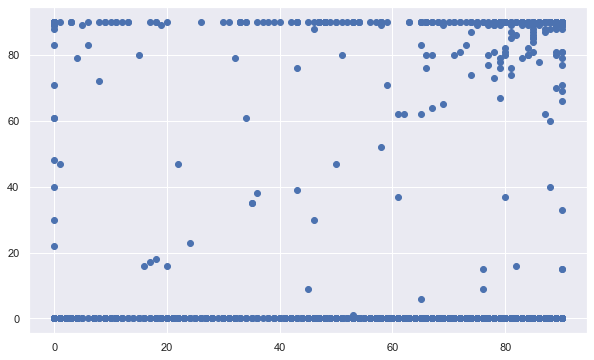

In [102]:
plt.scatter(data=y_graph, x = "availability_90", y = "prediction");

From the graph, it's clear that the model doesn't have a lot of predictive power. Let's check a linear regression. 

In [103]:
X, y = clean_data(merged_df,["room_type","neighbourhood_group_cleansed","accommodates","beds","minimum_nights_avg_ntm","maximum_nights_avg_ntm","review_scores_rating",
"review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value",
"instant_bookable","no_of_bathrooms","shared",'price_float_y'] ,"availability_90" )   

C:\Users\Darcy\AppData\Local\Temp\ipykernel_43556\4230153802.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna((df[col].mean()), inplace=True)


In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

#Instantiate
lm_model = LinearRegression() 

#Fit 
lm_model.fit(X_train, y_train) 

#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)

"The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test)

'The r-squared score for your model was 0.02689205851664256 on 2065 values.'

Again, an even worse r squared. Finding the relationship likely requires a more sophisticated technique. 

### What impacts number of reviews? 
I excluded number of reviews from previous analyses, because price and availablity likely drive the number of reviews. Let's test that intuition. 


In [105]:
X, y = clean_data(merged_df,['price_float_y',"availability_90"] ,"number_of_reviews")   

C:\Users\Darcy\AppData\Local\Temp\ipykernel_43556\4230153802.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna((df[col].mean()), inplace=True)


In [106]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6882 entries, 0 to 6881
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price_float_y    6882 non-null   float64
 1   availability_90  6882 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 161.3 KB


In [107]:
value_counts_ordered = merged_df['price_float_y'].value_counts().sort_index()

print(value_counts_ordered)

10.0       1
13.0       1
20.0       1
23.0       2
27.0       3
          ..
4500.0     1
4784.0     1
4850.0     1
9999.0     5
10000.0    3
Name: price_float_y, Length: 527, dtype: int64


In [108]:
nan_values = X.isnull().sum()
print(nan_values)

price_float_y      0
availability_90    0
dtype: int64


In [109]:
X.describe()

,price_float_y,availability_90
count,6882.000000,6882.000000
mean,219.456557,50.055507
std,416.481421,36.280638
min,10.000000,0.000000
25%,99.000000,0.000000
50%,145.000000,64.000000
75%,239.000000,83.000000
max,10000.000000,90.000000


In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

#Instantiate
lm_model = LinearRegression() 

#Fit 
lm_model.fit(X_train, y_train) 

#Predict and score the model
y_test_preds = lm_model.predict(X_test) 

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)

"The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test)

'The r-squared score for your model was 0.015329225650101752 on 2065 values.'

Well.... not really. 

It seems that what predicts number of reviews will also require a more sophisticated technique. 